In [3]:
!pip install kaggle

In [4]:


from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"samswam","key":"5258dfcb7e79a50e125a076f63a156ba"}'}

In [5]:


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
https://www.kaggle.com/datasets/brmil07/bank-stock-price

In [6]:
!kaggle datasets download -d brmil07/bank-stock-price

  0% 0.00/41.8k [00:00<?, ?B/s]
100% 41.8k/41.8k [00:00<00:00, 2.97MB/s]


In [14]:
file_name = "bank-stock-price.zip"
import zipfile
with zipfile.ZipFile(file_name, 'r') as zip_file:
    zip_file.extractall()
    print("Done extracting the Zip file...")

Done extracting the Zip file...


In [46]:
import pandas as pd

data = pd.read_csv("Bank_Stock_Price_10Y.csv")
print(data.head())

         Date    Open    High     Low   Close    Adj Close     Volume
0  2014-02-03  1980.0  2000.0  1965.0  1965.0  1691.382568   55407000
1  2014-02-04  1970.0  1980.0  1940.0  1970.0  1695.686035   83683500
2  2014-02-05  1980.0  1990.0  1965.0  1990.0  1712.901367   42715000
3  2014-02-06  1975.0  2030.0  1970.0  2030.0  1747.331299   63581000
4  2014-02-07  2050.0  2060.0  2035.0  2050.0  1764.546753  104825500


In [47]:
len(data)

2483

In [48]:



# Calculate price change
data['Price Change'] = data['Close'] - data['Close'].shift(1)

# Encode price change as a binary variable
data['Price Change'] = data['Price Change'].apply(lambda x: 1 if x > 0 else 0)


In [60]:
data1.drop(columns=["Date"],inplace=True)

In [84]:

X=data.iloc[:,:-1].values
y=data['Price Change']
features=data.columns[:-1]

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Splitting data for regression
#X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features[target_classification == 1], target_regression[target_classification == 1], test_size=0.2, random_state=42)


In [67]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = classifier.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Classification Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Classification Metrics:
Accuracy: 0.579476861167002
Precision: 0.5260663507109005
Recall: 0.5045454545454545
F1 Score: 0.5150812064965198


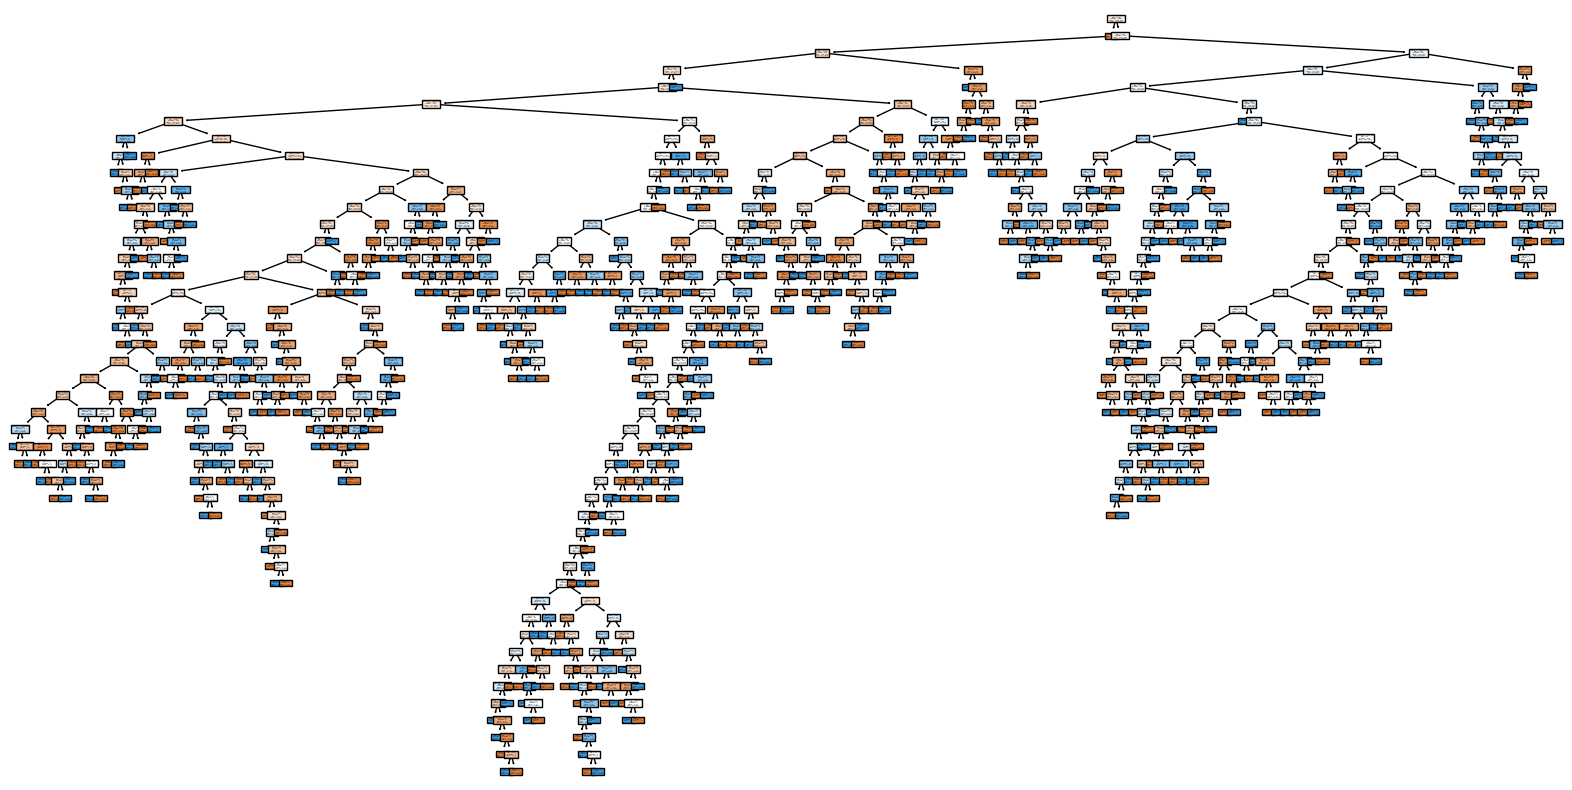

In [85]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True, feature_names=features, class_names=["Decrease", "Increase"])
plt.show()

